<a href="https://colab.research.google.com/github/burakemretetik/apply/blob/main/probability_distributions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Probability Distributions

1. Bernoulli
2. Binomial
3. Poisson
4. Geometric
5. Uniform
6. Exponential
7. Gamma
8. Normal

We will examine the moment generating function, calcualte the mean and variance using MGF.

---

### Import Dependencies

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gamma, beta as beta_fn

## Distributions:

### 1. Bernoulli Distribution

In [ ]:
# PMF: P(X=x) = p^x * (1-p)^(1-x) x ∈ {0,1}
# Mean: E[X] = p
# Variance: Var(X) = p(1−p)
# MGF: Mx(t) = E[e^tX] = 1-p + pe^t

In [59]:
# Ask the user for input
p = float(input("Enter the probability of success (p): "))

# Validate p: Ensure p is a valid probability (between 0 and 1)
if not 0 <= p <= 1:
    raise ValueError("p must be between 0 and 1.")

# Define the Moment Generating Function (MGF) of the Bernoulli distribution
def bernoulli_mgf(t, p):
    return 1 - p + p * np.exp(t)

# Define the first derivative of the MGF
def bernoulli_mgf_first_derivative(t, p):
    return p * np.exp(t)

# Define the second derivative of the MGF
def bernoulli_mgf_second_derivative(t, p):
    return p * np.exp(t)

# Mean = First derivative of MGF evaluated at t = 0
mean = bernoulli_mgf_first_derivative(0, p)

# Second moment = Second derivative of MGF evaluated at t = 0
second_moment = bernoulli_mgf_second_derivative(0, p)

# Variance = Second moment - (Mean)^2
variance = second_moment - mean**2

# Theoretical mean and variance for comparison
theoretical_mean = p  # For Bernoulli distribution, E[X] = p
theoretical_variance = p * (1 - p)  # For Bernoulli distribution, Var(X) = p(1 - p)

# Print the results
print("Moment Generating Function (MGF) of the Bernoulli distribution:")
print("(1 - p) + (p * e^t)")

print(f"\nFirst moment (E[X]) = {mean}")
print(f"Second moment (E[X^2]) = {second_moment}")

print(f"\nMean = E[X] = {mean}")
print(f"Variance = E[X^2] - E[X]^2 = {second_moment} - {mean}^2 = {variance}")

print(f"\nTheoretical Mean = p = {theoretical_mean}")
print(f"Theoretical Variance = p * (1 - p) = {theoretical_variance}")

print("\nInfo: n'th moment means the n'th derivative of MGF evaluated at t = 0")

Enter the probability of success (p): 0.5

First moment (E[X]) = 0.5
Second moment (E[X^2]) = 0.5

Mean = E[X] = 0.5
Variance = E[X^2] - E[X]^2 = 0.5 - 0.5^2 = 0.25

Theoretical Mean = p = 0.5
Theoretical Variance = p * (1 - p) = 0.25

Info: n'th moment means the n'th derivative of MGF evaluated at t = 0


Enter the number of samples (n): 30
Enter the probability of success (p): 0.5

Results:
Number of successes (1): 11
Number of failures (0): 19
Observed probability of success: 0.3667


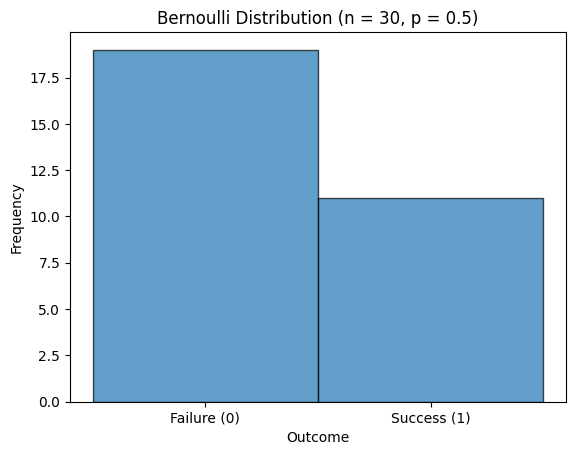

In [60]:
# Ask the user for input
n = int(input("Enter the number of samples (n): "))  # Number of samples
p = float(input("Enter the probability of success (p): "))  # Probability of success

# Validate p: Ensure p is a valid probability (between 0 and 1)
if not 0 <= p <= 1:
    raise ValueError("p must be between 0 and 1.")

# Generate n random samples from the Bernoulli distribution
samples = np.random.choice([0, 1], size=n, p=[1 - p, p])

# Count the number of successes (1) and failures (0)
success_count = np.sum(samples == 1)
failure_count = np.sum(samples == 0)

# Print the results
print("\nResults:")
print(f"Number of successes (1): {success_count}")
print(f"Number of failures (0): {failure_count}")
print(f"Observed probability of success: {success_count / n:.4f}")

# Visualize the results using a histogram
plt.hist(samples, bins=[-0.5, 0.5, 1.5], edgecolor='black', alpha=0.7)
plt.xticks([0, 1], ['Failure (0)', 'Success (1)'])
plt.xlabel("Outcome")
plt.ylabel("Frequency")
plt.title(f"Bernoulli Distribution (n = {n}, p = {p})")
plt.show()

### 2. Binomial Distribution

In [ ]:
# PMF: P(X=k) = C(n,k) * p^k * (1-p)^(n-k), k = 0,1,...,n
# Mean: E[X] = n*p
# Variance: Var(X) = n*p*(1-p)
# MGF: Mx(t) = (1-p + pe^t)^n

In [63]:
def binomial_mgf(t, n, p):
    return (1 - p + p * np.exp(t))**n

def binomial_mgf_first_derivative(t, n, p):
    return n * p * np.exp(t) * (1 - p + p * np.exp(t))**(n - 1)

def binomial_mgf_second_derivative(t, n, p):
    return n * p * np.exp(t) * (1 - p + p * np.exp(t))**(n - 1) + n * (n - 1) * p**2 * np.exp(2 * t) * (1 - p + p * np.exp(t))**(n - 2)

# User input for Binomial
n_binom = int(input("Enter the number of trials (n) for Binomial distribution: "))
p_binom = float(input("Enter the probability of success (p) for Binomial distribution: "))

# Validate p
if not 0 <= p_binom <= 1:
    raise ValueError("p must be between 0 and 1.")

# Compute mean and variance
mean_binom = binomial_mgf_first_derivative(0, n_binom, p_binom)
second_moment_binom = binomial_mgf_second_derivative(0, n_binom, p_binom)
variance_binom = second_moment_binom - mean_binom**2

# Theoretical values
theoretical_mean_binom = n_binom * p_binom
theoretical_variance_binom = n_binom * p_binom * (1 - p_binom)

# Print results
print("\nBinomial Distribution:")
print(f"MGF: (1 - p + p * e^t)^{n_binom}")
print(f"First moment (E[X]) = {mean_binom}")
print(f"Second moment (E[X^2]) = {second_moment_binom}")
print(f"Mean = E[X] = {mean_binom}")
print(f"Variance = E[X^2] - E[X]^2 = {second_moment_binom} - {mean_binom}^2 = {variance_binom}")
print(f"Theoretical Mean = n * p = {theoretical_mean_binom}")
print(f"Theoretical Variance = n * p * (1 - p) = {theoretical_variance_binom}")

Enter the number of trials (n) for Binomial distribution: 10
Enter the probability of success (p) for Binomial distribution: 0.5

Binomial Distribution:
MGF: (1 - p + p * e^t)^10
First moment (E[X]) = 5.0
Second moment (E[X^2]) = 27.5
Mean = E[X] = 5.0
Variance = E[X^2] - E[X]^2 = 27.5 - 5.0^2 = 2.5
Theoretical Mean = n * p = 5.0
Theoretical Variance = n * p * (1 - p) = 2.5


### 3. Poisson Distribution

In [ ]:
# PMF: P(X=k) = (λ^k * e^(-λ)) / k!, k = 0,1,2,...
# Mean: E[X] = λ
# Variance: Var(X) = λ
# MGF: Mx(t) = e^(λ(e^t - 1))

In [66]:
def poisson_mgf(t, lam):
    return np.exp(lam * (np.exp(t) - 1))

def poisson_mgf_first_derivative(t, lam):
    return lam * np.exp(t) * np.exp(lam * (np.exp(t) - 1))

def poisson_mgf_second_derivative(t, lam):
    return lam * np.exp(t) * (1 + lam * np.exp(t)) * np.exp(lam * (np.exp(t) - 1))

# User input for Poisson
lam = float(input("\nEnter the rate parameter (λ) for Poisson distribution: "))

# Compute mean and variance
mean_poisson = poisson_mgf_first_derivative(0, lam)
second_moment_poisson = poisson_mgf_second_derivative(0, lam)
variance_poisson = second_moment_poisson - mean_poisson**2

# Theoretical values
theoretical_mean_poisson = lam
theoretical_variance_poisson = lam

# Print results
print("\nPoisson Distribution:")
print(f"MGF: e^(λ(e^t - 1))")
print(f"First moment (E[X]) = {mean_poisson}")
print(f"Second moment (E[X^2]) = {second_moment_poisson}")
print(f"Mean = E[X] = {mean_poisson}")
print(f"Variance = E[X^2] - E[X]^2 = {second_moment_poisson} - {mean_poisson}^2 = {variance_poisson}")
print(f"Theoretical Mean = λ = {theoretical_mean_poisson}")
print(f"Theoretical Variance = λ = {theoretical_variance_poisson}")


Enter the rate parameter (λ) for Poisson distribution: 3

Poisson Distribution:
MGF: e^(λ(e^t - 1))
First moment (E[X]) = 3.0
Second moment (E[X^2]) = 12.0
Mean = E[X] = 3.0
Variance = E[X^2] - E[X]^2 = 12.0 - 3.0^2 = 3.0
Theoretical Mean = λ = 3.0
Theoretical Variance = λ = 3.0


### 4. Geometric Distribution

In [ ]:
# PMF: P(X=k) = (1-p)^(k-1) * p, k = 1,2,3,...
# Mean: E[X] = 1/p
# Variance: Var(X) = (1-p)/p^2
# MGF: Mx(t) = (pe^t) / (1 - (1-p)e^t), t < -ln(1-p)

In [68]:
def geometric_mgf(t, p):
    return (p * np.exp(t)) / (1 - (1 - p) * np.exp(t))

def geometric_mgf_first_derivative(t, p):
    return (p * np.exp(t)) / (1 - (1 - p) * np.exp(t))**2

def geometric_mgf_second_derivative(t, p):
    return (p * np.exp(t) * (1 + (1 - p) * np.exp(t))) / (1 - (1 - p) * np.exp(t))**3

# User input for Geometric
p_geom = float(input("\nEnter the probability of success (p) for Geometric distribution: "))

# Validate p
if not 0 <= p_geom <= 1:
    raise ValueError("p must be between 0 and 1.")

# Compute mean and variance
mean_geom = geometric_mgf_first_derivative(0, p_geom)
second_moment_geom = geometric_mgf_second_derivative(0, p_geom)
variance_geom = second_moment_geom - mean_geom**2

# Theoretical values
theoretical_mean_geom = 1 / p_geom
theoretical_variance_geom = (1 - p_geom) / p_geom**2

# Print results
print("\nGeometric Distribution:")
print(f"MGF: (p * e^t) / (1 - (1 - p) * e^t)")
print(f"First moment (E[X]) = {mean_geom}")
print(f"Second moment (E[X^2]) = {second_moment_geom}")
print(f"Mean = E[X] = {mean_geom}")
print(f"Variance = E[X^2] - E[X]^2 = {second_moment_geom} - {mean_geom}^2 = {variance_geom}")
print(f"Theoretical Mean = 1 / p = {theoretical_mean_geom}")
print(f"Theoretical Variance = (1 - p) / p^2 = {theoretical_variance_geom}")


Enter the probability of success (p) for Geometric distribution: 0.2

Geometric Distribution:
MGF: (p * e^t) / (1 - (1 - p) * e^t)
First moment (E[X]) = 5.000000000000003
Second moment (E[X^2]) = 45.000000000000036
Mean = E[X] = 5.000000000000003
Variance = E[X^2] - E[X]^2 = 45.000000000000036 - 5.000000000000003^2 = 20.00000000000001
Theoretical Mean = 1 / p = 5.0
Theoretical Variance = (1 - p) / p^2 = 19.999999999999996


### 5. Uniform Distribution

In [ ]:
# PDF: f(x) = 1/(b-a), a ≤ x ≤ b
# Mean: E[X] = (a+b)/2
# Variance: Var(X) = (b-a)^2 / 12
# MGF: Mx(t) = (e^(tb) - e^(ta)) / (t(b-a)), t ≠ 0

In [69]:
def uniform_mgf(t, a, b):
    if t == 0:
        return 1
    return (np.exp(t * b) - np.exp(t * a)) / (t * (b - a))

def uniform_mgf_first_derivative(t, a, b):
    if t == 0:
        return (a + b) / 2
    return (b * np.exp(t * b) - a * np.exp(t * a)) / (t * (b - a)) - (np.exp(t * b) - np.exp(t * a)) / (t**2 * (b - a))

def uniform_mgf_second_derivative(t, a, b):
    if t == 0:
        return (a**2 + a * b + b**2) / 3
    return (b**2 * np.exp(t * b) - a**2 * np.exp(t * a)) / (t * (b - a)) - 2 * (b * np.exp(t * b) - a * np.exp(t * a)) / (t**2 * (b - a)) + 2 * (np.exp(t * b) - np.exp(t * a)) / (t**3 * (b - a))

# User input for Uniform
a = float(input("\nEnter the lower bound (a) for Uniform distribution: "))
b = float(input("Enter the upper bound (b) for Uniform distribution: "))

# Validate a and b
if a >= b:
    raise ValueError("a must be less than b.")

# Compute mean and variance
mean_uniform = uniform_mgf_first_derivative(0, a, b)
second_moment_uniform = uniform_mgf_second_derivative(0, a, b)
variance_uniform = second_moment_uniform - mean_uniform**2

# Theoretical values
theoretical_mean_uniform = (a + b) / 2
theoretical_variance_uniform = (b - a)**2 / 12

# Print results
print("\nUniform Distribution:")
print(f"MGF: (e^(t*b) - e^(t*a)) / (t*(b - a))")
print(f"First moment (E[X]) = {mean_uniform}")
print(f"Second moment (E[X^2]) = {second_moment_uniform}")
print(f"Mean = E[X] = {mean_uniform}")
print(f"Variance = E[X^2] - E[X]^2 = {second_moment_uniform} - {mean_uniform}^2 = {variance_uniform}")
print(f"Theoretical Mean = (a + b) / 2 = {theoretical_mean_uniform}")
print(f"Theoretical Variance = (b - a)^2 / 12 = {theoretical_variance_uniform}")


Enter the lower bound (a) for Uniform distribution: 4
Enter the upper bound (b) for Uniform distribution: 15

Uniform Distribution:
MGF: (e^(t*b) - e^(t*a)) / (t*(b - a))
First moment (E[X]) = 9.5
Second moment (E[X^2]) = 100.33333333333333
Mean = E[X] = 9.5
Variance = E[X^2] - E[X]^2 = 100.33333333333333 - 9.5^2 = 10.083333333333329
Theoretical Mean = (a + b) / 2 = 9.5
Theoretical Variance = (b - a)^2 / 12 = 10.083333333333334


### 6. Exponential Distribution

In [ ]:
# PDF: f(x) = λe^(-λx), x ≥ 0
# Mean: E[X] = 1/λ
# Variance: Var(X) = 1/λ^2
# MGF: Mx(t) = λ / (λ - t), t < λ

In [70]:
def exponential_mgf(t, lam):
    return lam / (lam - t)

def exponential_mgf_first_derivative(t, lam):
    return lam / (lam - t)**2

def exponential_mgf_second_derivative(t, lam):
    return 2 * lam / (lam - t)**3

# User input for Exponential
lam = float(input("\nEnter the rate parameter (λ) for Exponential distribution: "))

# Validate lambda
if lam <= 0:
    raise ValueError("λ must be greater than 0.")

# Compute mean and variance
mean_exponential = exponential_mgf_first_derivative(0, lam)
second_moment_exponential = exponential_mgf_second_derivative(0, lam)
variance_exponential = second_moment_exponential - mean_exponential**2

# Theoretical values
theoretical_mean_exponential = 1 / lam
theoretical_variance_exponential = 1 / lam**2

# Print results
print("\nExponential Distribution:")
print(f"MGF: λ / (λ - t)")
print(f"First moment (E[X]) = {mean_exponential}")
print(f"Second moment (E[X^2]) = {second_moment_exponential}")
print(f"Mean = E[X] = {mean_exponential}")
print(f"Variance = E[X^2] - E[X]^2 = {second_moment_exponential} - {mean_exponential}^2 = {variance_exponential}")
print(f"Theoretical Mean = 1 / λ = {theoretical_mean_exponential}")
print(f"Theoretical Variance = 1 / λ^2 = {theoretical_variance_exponential}")


Enter the rate parameter (λ) for Exponential distribution: 5

Exponential Distribution:
MGF: λ / (λ - t)
First moment (E[X]) = 0.2
Second moment (E[X^2]) = 0.08
Mean = E[X] = 0.2
Variance = E[X^2] - E[X]^2 = 0.08 - 0.2^2 = 0.039999999999999994
Theoretical Mean = 1 / λ = 0.2
Theoretical Variance = 1 / λ^2 = 0.04


### 7. Gama Distribution

In [ ]:
# PDF: f(x) = (β^α / Γ(α)) * x^(α-1) * e^(-βx), x ≥ 0
# Mean: E[X] = α / β
# Variance: Var(X) = α / β^2
# MGF: Mx(t) = (β / (β - t))^α, t < β

In [71]:
def gamma_mgf(t, alpha, beta):
    return (beta / (beta - t))**alpha

def gamma_mgf_first_derivative(t, alpha, beta):
    return alpha * beta**alpha / (beta - t)**(alpha + 1)

def gamma_mgf_second_derivative(t, alpha, beta):
    return alpha * (alpha + 1) * beta**alpha / (beta - t)**(alpha + 2)

# User input for Gamma
alpha_gamma = float(input("\nEnter the shape parameter (α) for Gamma distribution: "))
beta_gamma = float(input("Enter the rate parameter (β) for Gamma distribution: "))

# Validate alpha and beta
if alpha_gamma <= 0 or beta_gamma <= 0:
    raise ValueError("α and β must be greater than 0.")

# Compute mean and variance
mean_gamma = gamma_mgf_first_derivative(0, alpha_gamma, beta_gamma)
second_moment_gamma = gamma_mgf_second_derivative(0, alpha_gamma, beta_gamma)
variance_gamma = second_moment_gamma - mean_gamma**2

# Theoretical values
theoretical_mean_gamma = alpha_gamma / beta_gamma
theoretical_variance_gamma = alpha_gamma / beta_gamma**2

# Print results
print("\nGamma Distribution:")
print(f"MGF: (β / (β - t))^{alpha_gamma}")
print(f"First moment (E[X]) = {mean_gamma}")
print(f"Second moment (E[X^2]) = {second_moment_gamma}")
print(f"Mean = E[X] = {mean_gamma}")
print(f"Variance = E[X^2] - E[X]^2 = {second_moment_gamma} - {mean_gamma}^2 = {variance_gamma}")
print(f"Theoretical Mean = α / β = {theoretical_mean_gamma}")
print(f"Theoretical Variance = α / β^2 = {theoretical_variance_gamma}")


Enter the shape parameter (α) for Gamma distribution: 3
Enter the rate parameter (β) for Gamma distribution: 2

Gamma Distribution:
MGF: (β / (β - t))^3.0
First moment (E[X]) = 1.5
Second moment (E[X^2]) = 3.0
Mean = E[X] = 1.5
Variance = E[X^2] - E[X]^2 = 3.0 - 1.5^2 = 0.75
Theoretical Mean = α / β = 1.5
Theoretical Variance = α / β^2 = 0.75


### 8. Normal Distribution

In [ ]:
# PDF: f(x) = (1/√(2πσ^2)) * e^(-(x-μ)^2 / (2σ^2))
# Mean: E[X] = μ
# Variance: Var(X) = σ^2
# MGF: Mx(t) = e^(μt + (1/2)σ^2t^2)

In [72]:
def normal_mgf(t, mu, sigma):
    return np.exp(mu * t + 0.5 * sigma**2 * t**2)

def normal_mgf_first_derivative(t, mu, sigma):
    return (mu + sigma**2 * t) * np.exp(mu * t + 0.5 * sigma**2 * t**2)

def normal_mgf_second_derivative(t, mu, sigma):
    return (sigma**2 + (mu + sigma**2 * t)**2) * np.exp(mu * t + 0.5 * sigma**2 * t**2)

# User input for Normal
mu = float(input("\nEnter the mean (μ) for Normal distribution: "))
sigma = float(input("Enter the standard deviation (σ) for Normal distribution: "))

# Validate sigma
if sigma <= 0:
    raise ValueError("σ must be greater than 0.")

# Compute mean and variance
mean_normal = normal_mgf_first_derivative(0, mu, sigma)
second_moment_normal = normal_mgf_second_derivative(0, mu, sigma)
variance_normal = second_moment_normal - mean_normal**2

# Theoretical values
theoretical_mean_normal = mu
theoretical_variance_normal = sigma**2

# Print results
print("\nNormal Distribution:")
print(f"MGF: e^(μt + 0.5σ^2t^2)")
print(f"First moment (E[X]) = {mean_normal}")
print(f"Second moment (E[X^2]) = {second_moment_normal}")
print(f"Mean = E[X] = {mean_normal}")
print(f"Variance = E[X^2] - E[X]^2 = {second_moment_normal} - {mean_normal}^2 = {variance_normal}")
print(f"Theoretical Mean = μ = {theoretical_mean_normal}")
print(f"Theoretical Variance = σ^2 = {theoretical_variance_normal}")


Enter the mean (μ) for Normal distribution: 20
Enter the standard deviation (σ) for Normal distribution: 2

Normal Distribution:
MGF: e^(μt + 0.5σ^2t^2)
First moment (E[X]) = 20.0
Second moment (E[X^2]) = 404.0
Mean = E[X] = 20.0
Variance = E[X^2] - E[X]^2 = 404.0 - 20.0^2 = 4.0
Theoretical Mean = μ = 20.0
Theoretical Variance = σ^2 = 4.0


## Visualizations

### Theoretical PDF/PMF and CDF

Available distributions:
1. Bernoulli
2. Binomial
3. Poisson
4. Geometric
5. Uniform
6. Exponential
7. Gamma
8. Normal
Select a distribution (enter the corresponding number): 7
Enter the shape parameter (α): 5
Enter the rate parameter (β): 3


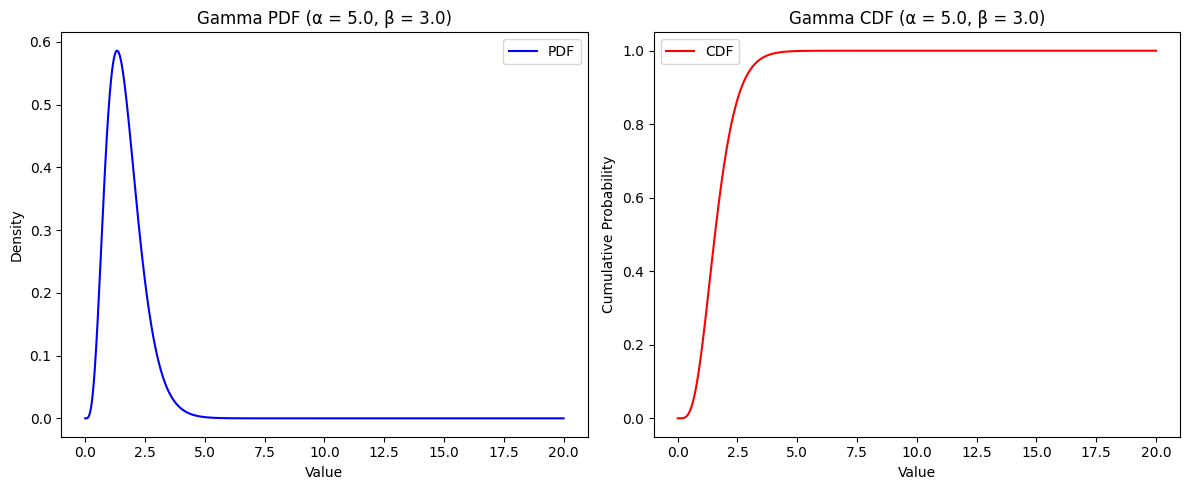

In [83]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import bernoulli, binom, poisson, geom, uniform, expon, gamma, norm

def visualize_pdf_pmf_cdf(distribution, params):
    """
    Visualizes the PDF/PMF and CDF of the selected distribution.

    Parameters:
    distribution (str): Name of the distribution.
    params (dict): Parameters of the distribution.
    """
    plt.figure(figsize=(12, 5))

    # Plot PDF/PMF
    plt.subplot(1, 2, 1)  # First subplot for PDF/PMF
    if distribution == "Bernoulli":
        x = np.arange(2)  # Possible outcomes: 0 and 1
        pmf = bernoulli.pmf(x, params["p"])
        plt.bar(x, pmf, color='blue', alpha=0.7, label="PMF")
        plt.xticks(x, ['Failure (0)', 'Success (1)'])
        plt.xlabel("Outcome")
        plt.ylabel("Probability")
        plt.title(f"Bernoulli PMF (p = {params['p']})")

    elif distribution == "Binomial":
        x = np.arange(params["n"] + 1)  # Possible outcomes: 0 to n
        pmf = binom.pmf(x, params["n"], params["p"])
        plt.plot(x, pmf, 'bo-', label="PMF")
        plt.xlabel("Number of Successes")
        plt.ylabel("Probability")
        plt.title(f"Binomial PMF (n = {params['n']}, p = {params['p']})")

    elif distribution == "Poisson":
        x = np.arange(0, 20)  # Adjust range as needed
        pmf = poisson.pmf(x, params["lam"])
        plt.plot(x, pmf, 'bo-', label="PMF")
        plt.xlabel("Number of Events")
        plt.ylabel("Probability")
        plt.title(f"Poisson PMF (λ = {params['lam']})")

    elif distribution == "Geometric":
        x = np.arange(1, 20)  # Adjust range as needed
        pmf = geom.pmf(x, params["p"])
        plt.plot(x, pmf, 'bo-', label="PMF")
        plt.xlabel("Number of Trials Until Success")
        plt.ylabel("Probability")
        plt.title(f"Geometric PMF (p = {params['p']})")

    elif distribution == "Uniform":
        x = np.linspace(params["a"], params["b"], 1000)
        pdf = uniform.pdf(x, params["a"], params["b"] - params["a"])
        plt.plot(x, pdf, 'b-', label="PDF")
        plt.xlabel("Value")
        plt.ylabel("Density")
        plt.title(f"Uniform PDF (a = {params['a']}, b = {params['b']})")

    elif distribution == "Exponential":
        x = np.linspace(0, 10 / params["lam"], 1000)  # Adjust range as needed
        pdf = expon.pdf(x, scale=1 / params["lam"])
        plt.plot(x, pdf, 'b-', label="PDF")
        plt.xlabel("Value")
        plt.ylabel("Density")
        plt.title(f"Exponential PDF (λ = {params['lam']})")

    elif distribution == "Gamma":
        x = np.linspace(0, 20, 1000)  # Adjust range as needed
        pdf = gamma.pdf(x, params["alpha"], scale=1 / params["beta"])
        plt.plot(x, pdf, 'b-', label="PDF")
        plt.xlabel("Value")
        plt.ylabel("Density")
        plt.title(f"Gamma PDF (α = {params['alpha']}, β = {params['beta']})")

    elif distribution == "Normal":
        x = np.linspace(params["mu"] - 4 * params["sigma"], params["mu"] + 4 * params["sigma"], 1000)
        pdf = norm.pdf(x, params["mu"], params["sigma"])
        plt.plot(x, pdf, 'b-', label="PDF")
        plt.xlabel("Value")
        plt.ylabel("Density")
        plt.title(f"Normal PDF (μ = {params['mu']}, σ = {params['sigma']})")

    else:
        raise ValueError("Invalid distribution selected.")

    plt.legend()

    # Plot CDF
    plt.subplot(1, 2, 2)  # Second subplot for CDF
    if distribution == "Bernoulli":
        x = np.arange(2)  # Possible outcomes: 0 and 1
        cdf = bernoulli.cdf(x, params["p"])
        plt.step(x, cdf, 'r-', where='post', label="CDF")
        plt.xticks(x, ['Failure (0)', 'Success (1)'])
        plt.xlabel("Outcome")
        plt.ylabel("Cumulative Probability")
        plt.title(f"Bernoulli CDF (p = {params['p']})")

    elif distribution == "Binomial":
        x = np.arange(params["n"] + 1)  # Possible outcomes: 0 to n
        cdf = binom.cdf(x, params["n"], params["p"])
        plt.step(x, cdf, 'ro-', where='post', label="CDF")
        plt.xlabel("Number of Successes")
        plt.ylabel("Cumulative Probability")
        plt.title(f"Binomial CDF (n = {params['n']}, p = {params['p']})")

    elif distribution == "Poisson":
        x = np.arange(0, 20)  # Adjust range as needed
        cdf = poisson.cdf(x, params["lam"])
        plt.step(x, cdf, 'ro-', where='post', label="CDF")
        plt.xlabel("Number of Events")
        plt.ylabel("Cumulative Probability")
        plt.title(f"Poisson CDF (λ = {params['lam']})")

    elif distribution == "Geometric":
        x = np.arange(1, 20)  # Adjust range as needed
        cdf = geom.cdf(x, params["p"])
        plt.step(x, cdf, 'ro-', where='post', label="CDF")
        plt.xlabel("Number of Trials Until Success")
        plt.ylabel("Cumulative Probability")
        plt.title(f"Geometric CDF (p = {params['p']})")

    elif distribution == "Uniform":
        x = np.linspace(params["a"], params["b"], 1000)
        cdf = uniform.cdf(x, params["a"], params["b"] - params["a"])
        plt.plot(x, cdf, 'r-', label="CDF")
        plt.xlabel("Value")
        plt.ylabel("Cumulative Probability")
        plt.title(f"Uniform CDF (a = {params['a']}, b = {params['b']})")

    elif distribution == "Exponential":
        x = np.linspace(0, 10 / params["lam"], 1000)  # Adjust range as needed
        cdf = expon.cdf(x, scale=1 / params["lam"])
        plt.plot(x, cdf, 'r-', label="CDF")
        plt.xlabel("Value")
        plt.ylabel("Cumulative Probability")
        plt.title(f"Exponential CDF (λ = {params['lam']})")

    elif distribution == "Gamma":
        x = np.linspace(0, 20, 1000)  # Adjust range as needed
        cdf = gamma.cdf(x, params["alpha"], scale=1 / params["beta"])
        plt.plot(x, cdf, 'r-', label="CDF")
        plt.xlabel("Value")
        plt.ylabel("Cumulative Probability")
        plt.title(f"Gamma CDF (α = {params['alpha']}, β = {params['beta']})")

    elif distribution == "Normal":
        x = np.linspace(params["mu"] - 4 * params["sigma"], params["mu"] + 4 * params["sigma"], 1000)
        cdf = norm.cdf(x, params["mu"], params["sigma"])
        plt.plot(x, cdf, 'r-', label="CDF")
        plt.xlabel("Value")
        plt.ylabel("Cumulative Probability")
        plt.title(f"Normal CDF (μ = {params['mu']}, σ = {params['sigma']})")

    plt.legend()
    plt.tight_layout()
    plt.show()

# Main program
if __name__ == "__main__":
    # List of available distributions
    distributions = [
        "Bernoulli", "Binomial", "Poisson", "Geometric",
        "Uniform", "Exponential", "Gamma", "Normal"
    ]

    # Ask the user to select a distribution
    print("Available distributions:")
    for i, dist in enumerate(distributions, 1):
        print(f"{i}. {dist}")
    choice = int(input("Select a distribution (enter the corresponding number): ")) - 1

    if choice < 0 or choice >= len(distributions):
        raise ValueError("Invalid selection.")

    selected_distribution = distributions[choice]

    # Ask for parameters based on the selected distribution
    params = {}
    if selected_distribution == "Bernoulli":
        params["p"] = float(input("Enter the probability of success (p): "))
        if not 0 <= params["p"] <= 1:
            raise ValueError("p must be between 0 and 1.")

    elif selected_distribution == "Binomial":
        params["n"] = int(input("Enter the number of trials (n): "))
        params["p"] = float(input("Enter the probability of success (p): "))
        if not 0 <= params["p"] <= 1:
            raise ValueError("p must be between 0 and 1.")

    elif selected_distribution == "Poisson":
        params["lam"] = float(input("Enter the rate parameter (λ): "))
        if params["lam"] <= 0:
            raise ValueError("λ must be greater than 0.")

    elif selected_distribution == "Geometric":
        params["p"] = float(input("Enter the probability of success (p): "))
        if not 0 <= params["p"] <= 1:
            raise ValueError("p must be between 0 and 1.")

    elif selected_distribution == "Uniform":
        params["a"] = float(input("Enter the lower bound (a): "))
        params["b"] = float(input("Enter the upper bound (b): "))
        if params["a"] >= params["b"]:
            raise ValueError("a must be less than b.")

    elif selected_distribution == "Exponential":
        params["lam"] = float(input("Enter the rate parameter (λ): "))
        if params["lam"] <= 0:
            raise ValueError("λ must be greater than 0.")

    elif selected_distribution == "Gamma":
        params["alpha"] = float(input("Enter the shape parameter (α): "))
        params["beta"] = float(input("Enter the rate parameter (β): "))
        if params["alpha"] <= 0 or params["beta"] <= 0:
            raise ValueError("α and β must be greater than 0.")

    elif selected_distribution == "Normal":
        params["mu"] = float(input("Enter the mean (μ): "))
        params["sigma"] = float(input("Enter the standard deviation (σ): "))
        if params["sigma"] <= 0:
            raise ValueError("σ must be greater than 0.")

    # Visualize the PDF/PMF and CDF
    visualize_pdf_pmf_cdf(selected_distribution, params)

### Empirical Distribution (Histogram of Samples)

Available distributions:
1. Bernoulli
2. Binomial
3. Poisson
4. Geometric
5. Uniform
6. Exponential
7. Gamma
8. Normal
Select a distribution (enter the corresponding number): 3
Enter the rate parameter (λ): 4
Enter the sample size: 100


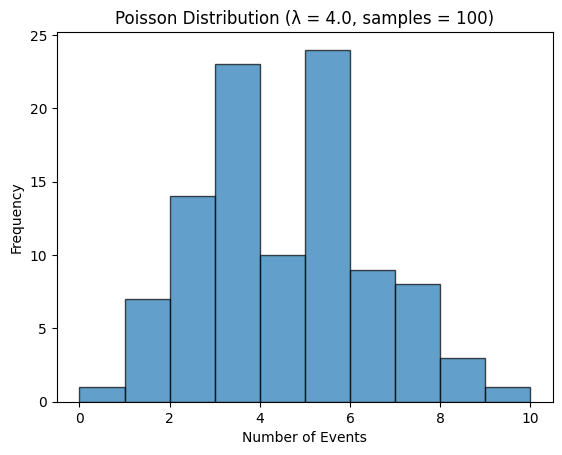

In [77]:
import numpy as np
import matplotlib.pyplot as plt

# Function to visualize distributions
def visualize_distribution(distribution, params, sample_size):
    """
    Visualizes the selected distribution using a histogram or bar plot.

    Parameters:
    distribution (str): Name of the distribution.
    params (dict): Parameters of the distribution.
    sample_size (int): Number of samples to generate.
    """
    # Generate samples
    if distribution == "Bernoulli":
        samples = np.random.binomial(1, params["p"], sample_size)
        plt.hist(samples, bins=[-0.5, 0.5, 1.5], edgecolor='black', alpha=0.7)
        plt.xticks([0, 1], ['Failure (0)', 'Success (1)'])
        plt.xlabel("Outcome")
        plt.ylabel("Frequency")
        plt.title(f"Bernoulli Distribution (p = {params['p']}, n = {sample_size})")

    elif distribution == "Binomial":
        samples = np.random.binomial(params["n"], params["p"], sample_size)
        plt.hist(samples, bins=range(params["n"] + 2), edgecolor='black', alpha=0.7)
        plt.xlabel("Number of Successes")
        plt.ylabel("Frequency")
        plt.title(f"Binomial Distribution (n = {params['n']}, p = {params['p']}, samples = {sample_size})")

    elif distribution == "Poisson":
        samples = np.random.poisson(params["lam"], sample_size)
        plt.hist(samples, bins=range(0, max(samples) + 2), edgecolor='black', alpha=0.7)
        plt.xlabel("Number of Events")
        plt.ylabel("Frequency")
        plt.title(f"Poisson Distribution (λ = {params['lam']}, samples = {sample_size})")

    elif distribution == "Geometric":
        samples = np.random.geometric(params["p"], sample_size)
        plt.hist(samples, bins=range(1, max(samples) + 2), edgecolor='black', alpha=0.7)
        plt.xlabel("Number of Trials Until Success")
        plt.ylabel("Frequency")
        plt.title(f"Geometric Distribution (p = {params['p']}, samples = {sample_size})")

    elif distribution == "Uniform":
        samples = np.random.uniform(params["a"], params["b"], sample_size)
        plt.hist(samples, bins=30, edgecolor='black', alpha=0.7)
        plt.xlabel("Value")
        plt.ylabel("Frequency")
        plt.title(f"Uniform Distribution (a = {params['a']}, b = {params['b']}, samples = {sample_size})")

    elif distribution == "Exponential":
        samples = np.random.exponential(1 / params["lam"], sample_size)
        plt.hist(samples, bins=30, edgecolor='black', alpha=0.7)
        plt.xlabel("Value")
        plt.ylabel("Frequency")
        plt.title(f"Exponential Distribution (λ = {params['lam']}, samples = {sample_size})")

    elif distribution == "Gamma":
        samples = np.random.gamma(params["alpha"], 1 / params["beta"], sample_size)
        plt.hist(samples, bins=30, edgecolor='black', alpha=0.7)
        plt.xlabel("Value")
        plt.ylabel("Frequency")
        plt.title(f"Gamma Distribution (α = {params['alpha']}, β = {params['beta']}, samples = {sample_size})")

    elif distribution == "Normal":
        samples = np.random.normal(params["mu"], params["sigma"], sample_size)
        plt.hist(samples, bins=30, edgecolor='black', alpha=0.7)
        plt.xlabel("Value")
        plt.ylabel("Frequency")
        plt.title(f"Normal Distribution (μ = {params['mu']}, σ = {params['sigma']}, samples = {sample_size})")

    else:
        raise ValueError("Invalid distribution selected.")

    # Show the plot
    plt.show()

# Main program
if __name__ == "__main__":
    # List of available distributions
    distributions = [
        "Bernoulli", "Binomial", "Poisson", "Geometric",
        "Uniform", "Exponential", "Gamma", "Normal"
    ]

    # Ask the user to select a distribution
    print("Available distributions:")
    for i, dist in enumerate(distributions, 1):
        print(f"{i}. {dist}")
    choice = int(input("Select a distribution (enter the corresponding number): ")) - 1

    if choice < 0 or choice >= len(distributions):
        raise ValueError("Invalid selection.")

    selected_distribution = distributions[choice]

    # Ask for parameters based on the selected distribution
    params = {}
    if selected_distribution == "Bernoulli":
        params["p"] = float(input("Enter the probability of success (p): "))
        if not 0 <= params["p"] <= 1:
            raise ValueError("p must be between 0 and 1.")

    elif selected_distribution == "Binomial":
        params["n"] = int(input("Enter the number of trials (n): "))
        params["p"] = float(input("Enter the probability of success (p): "))
        if not 0 <= params["p"] <= 1:
            raise ValueError("p must be between 0 and 1.")

    elif selected_distribution == "Poisson":
        params["lam"] = float(input("Enter the rate parameter (λ): "))
        if params["lam"] <= 0:
            raise ValueError("λ must be greater than 0.")

    elif selected_distribution == "Geometric":
        params["p"] = float(input("Enter the probability of success (p): "))
        if not 0 <= params["p"] <= 1:
            raise ValueError("p must be between 0 and 1.")

    elif selected_distribution == "Uniform":
        params["a"] = float(input("Enter the lower bound (a): "))
        params["b"] = float(input("Enter the upper bound (b): "))
        if params["a"] >= params["b"]:
            raise ValueError("a must be less than b.")

    elif selected_distribution == "Exponential":
        params["lam"] = float(input("Enter the rate parameter (λ): "))
        if params["lam"] <= 0:
            raise ValueError("λ must be greater than 0.")

    elif selected_distribution == "Gamma":
        params["alpha"] = float(input("Enter the shape parameter (α): "))
        params["beta"] = float(input("Enter the rate parameter (β): "))
        if params["alpha"] <= 0 or params["beta"] <= 0:
            raise ValueError("α and β must be greater than 0.")

    elif selected_distribution == "Normal":
        params["mu"] = float(input("Enter the mean (μ): "))
        params["sigma"] = float(input("Enter the standard deviation (σ): "))
        if params["sigma"] <= 0:
            raise ValueError("σ must be greater than 0.")

    # Ask for sample size
    sample_size = int(input("Enter the sample size: "))

    # Visualize the distribution
    visualize_distribution(selected_distribution, params, sample_size)